In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def x_expr(x):
    return x
def y_expr(y):
    return y
def t_min_in(minimum=-1):
    return minimum
def t_max_in(maximum=1):
    return maximum

Write an expression for the x coordinate in terms of t.

In [3]:
x_interact = interactive(x_expr,x="t")
display(x_interact)

interactive(children=(Text(value='t', description='x'), Output()), _dom_classes=('widget-interact',))

Write an expression for the y coordinate in terms of t

In [4]:
y_interact = interactive(y_expr,y="t^2")
display(y_interact)

interactive(children=(Text(value='t^2', description='y'), Output()), _dom_classes=('widget-interact',))

Specify the minimum t value

In [5]:
t_min_var = interactive(t_min_in,minimum=(-5,-0.1))
display(t_min_var)

interactive(children=(FloatSlider(value=-1.0, description='minimum', max=-0.1, min=-5.0), Output()), _dom_clas…

Specify the maximum t value

In [6]:
t_max_var = interactive(t_max_in,maximum=(0.1,5))
display(t_max_var)

interactive(children=(FloatSlider(value=1.0, description='maximum', max=5.0, min=0.1), Output()), _dom_classes…

In [7]:
x(t) = x_interact.result
y(t) = y_interact.result
t_min = t_min_var.result
t_max = t_max_var.result

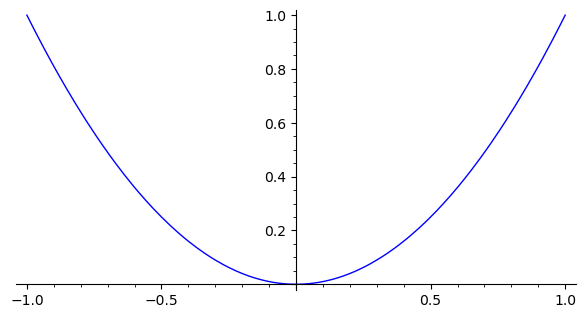

In [8]:
original_graph = parametric_plot((x,y), (t_min,t_max))
original_graph

# Evolutes \(Huygens, 1673; Tucker, 1864\)



## Definition



The **evolute** of a curve $C$ is the locus of its center of curvature. Fix a point $(x,y)$ on the curve $C$ and set $(x_e,y_e)$ to be the center of the circle of curvature for $(x,y)$ on $C$. Say the curvature at $(x,y)$ of $C$ is $K$ and that $(x,y)$ is at angle $\phi$ on the circle, from the top down. Then
$$
x - x_e = \rho\sin(\phi) \implies \alpha = x - \rho\sin(\phi)
$$
and
$$
y - y_e = -\rho\cos(\phi) \implies \beta = y + \rho\cos(\phi),
$$
Where $\rho = \frac{1}{K}$. Notice that $\tan(\phi) = \frac{y'}{x'}$, so
$$
\sin(\phi) = \frac{y'}{\sqrt{(x')^2 + (y')^2}} \text{ and } \cos(\phi) = \frac{x'}{\sqrt{(x')^2 + (y')^2}}.
$$
Now recall that $K$ has formula
$$
K = \frac{x'y'' - y''x'}{[(x')^2 + (y')^2]^{3/2}} \implies \rho = \frac{[(x')^2 + (y')^2]^{3/2}}{x'y'' - y''x'}.
$$
Thus
$$
x_e = x - \frac{[(x')^2 + (y')^2]^{3/2}}{x'y'' - y''x'} \cdot \frac{y'}{\sqrt{(x')^2 + (y')^2}} = x - y'\frac{(x')^2 + (y')^2}{x'y'' - x''y'}
$$
and
$$
y_e = y + \frac{[(x')^2 + (y')^2]^{3/2}}{x'y'' - y''x'}\frac{x'}{\sqrt{(x')^2 + (y')^2}} = y + x'\frac{(x')^2 + (y')^2}{x'y'' - x''y'}.
$$

## Graph of the Evolute



In [9]:
x_prime = derivative(x,t)
x_pprime = derivative(x_prime,t)
y_prime = derivative(y,t)
y_pprime = derivative(y_prime,t)

In [10]:
x_evol = x - y_prime*(x_prime^2 + y_prime^2)/(x_prime*y_pprime - y_prime*x_pprime)
y_evol = y + x_prime*(x_prime^2 + y_prime^2)/(x_prime*y_pprime - y_prime*x_pprime)
x_evol_simple = x_evol.full_simplify()
y_evol_simple = y_evol.full_simplify()

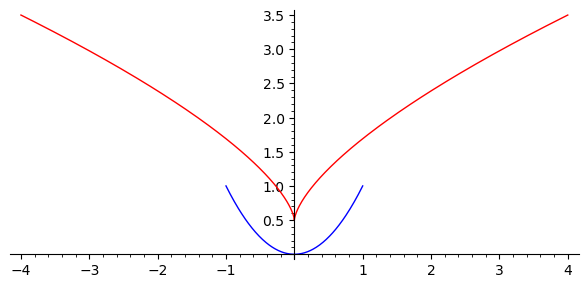

In [11]:
evolute_graph = parametric_plot((x_evol_simple,y_evol_simple),(t_min,t_max), color = 'red')
original_graph + evolute_graph

## Parametric Equation of the Evolute

The formula for the x-coordinate of the evolute is:

In [12]:
pretty_print(x_evol_simple)

-4*t^3

The formula for the y-coordinate of the evolute is:


In [13]:
pretty_print(y_evol_simple)

3*t^2 + 1/2